In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import random as rand
import numpy as np

filepath='C:\\PSn\\gadm36_PRT.gpkg'

#Read the shapefile
shapefile = gpd.read_file(filepath)

C:\Users\dats9\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [2]:
'Join all the freguesias in a concelho, including their polygons (done with dissolve)'

#Criar uma coluna chamada join, preenchida com 'NAME_1NAME_2'
shapefile['join']=shapefile['NAME_1']+shapefile['NAME_2']

#juntar os polygons de cada freguesia que tenham o mesmo nome na coluna join
shp=shapefile.dissolve(by='join')

shp

,geometry,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3
join,,,,,,,,,,,,,,,,,
AveiroAlbergaria-a-Velha,"POLYGON ((-8.52971 40.60983, -8.53032 40.61008...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.2_1,Albergaria-a-Velha,None,PRT.1.2.1_1,Albergaria-A-Velha,None,None,Parish,Parish,None,None
AveiroAnadia,"POLYGON ((-8.45104 40.39801, -8.45178 40.39767...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.3_1,Anadia,None,PRT.1.3.1_1,Aguim,None,None,Parish,Parish,None,None
AveiroArouca,"POLYGON ((-8.29139 40.86604, -8.29141 40.86607...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.4_1,Arouca,None,PRT.1.4.1_1,Albergaria Da Serra,None,None,Parish,Parish,None,None
AveiroAveiro,"MULTIPOLYGON (((-8.57014 40.55369, -8.57013 40...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.5_1,Aveiro,None,PRT.1.5.1_1,Aradas,None,None,Parish,Parish,None,None
AveiroCastelo de Paiva,"POLYGON ((-8.27201 41.06475, -8.26861 41.06418...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.6_1,Castelo de Paiva,None,PRT.1.6.1_1,Bairros,None,None,Parish,Parish,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ÉvoraReguengos de Monsaraz,"POLYGON ((-7.45701 38.22827, -7.45707 38.22775...",PRT,Portugal,PRT.8_1,Évora,None,PRT.8.11_1,Reguengos de Monsaraz,None,PRT.8.11.1_1,Campinho,None,None,Parish,Parish,None,None
ÉvoraVendas Novas,"POLYGON ((-8.57746 38.54634, -8.57794 38.54599...",PRT,Portugal,PRT.8_1,Évora,None,PRT.8.12_1,Vendas Novas,None,PRT.8.12.1_1,Landeira,None,None,Parish,Parish,None,None
ÉvoraViana do Alentejo,"POLYGON ((-7.93691 38.30176, -7.93715 38.30195...",PRT,Portugal,PRT.8_1,Évora,None,PRT.8.13_1,Viana do Alentejo,None,PRT.8.13.1_1,Aguiar,None,None,Parish,Parish,None,None


In [6]:
"Obter a lista dos nomes dos municipios tendo em atenção a existência de espaços como 'Portugal ' em"
"todas as células do data.xls"

#Ler O excel data criado na aula anterior
exc= pd.read_excel('C:\\PSn\\data.xlsx', index_col='Unnamed: 0')

#Tirar os espaços do index que pretendemos obter
exc.index = [s.strip() for s in exc.index]

#Obter uma lista do index, sem portugal, para o ano 2010
munExcel = exc[exc['Ano']==2010].drop('Portugal').index.tolist()

#Criar uma lista dos municipios presentes no shapefile
munGeo=shp['NAME_2'].to_list()

In [7]:
'Para retificar os que estão em falta no código da próxima celula'

#Caso tenha acentos para tirar.
shp.loc[shp['NAME_2'] == 'Ponte de Sôr', 'NAME_2'] = 'Ponte de Sor' 
shp.loc[shp['NAME_2'] == 'Praia da Vitória', 'NAME_2'] = 'Vila da Praia da Vitória'

#Distinguir qual dos municipios pertence a que concelho
shp.loc[((shp['NAME_2'] == 'Calheta') & (shp['NAME_1']=='Azores')), 'NAME_2'] = 'Calheta [R.A.A.]'
shp.loc[((shp['NAME_2'] == 'Calheta') & (shp['NAME_1']=='Madeira')), 'NAME_2'] = 'Calheta [R.A.M.]'
shp.loc[((shp['NAME_2'] == 'Lagoa') & (shp['NAME_1']=='Azores')), 'NAME_2'] = 'Lagoa [R.A.A.]'

In [8]:
'Comparação para ver se estão iguais'

#Ver quais os que estão em falta
print('No Excel:')
for m in munExcel:
    if m not in munGeo:
        print('Falta', m)
print('******')
print('No Shapefile:')
for m in munGeo:
    if m not in munExcel:
        print('Falta', m)

No Excel:
******
No Shapefile:


In [9]:
"Para indexar pela freguesia como no excel dataframe"
shp.index=shp['NAME_2']
shp

,geometry,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3
NAME_2,,,,,,,,,,,,,,,,,
Albergaria-a-Velha,"POLYGON ((-8.52971 40.60983, -8.53032 40.61008...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.2_1,Albergaria-a-Velha,None,PRT.1.2.1_1,Albergaria-A-Velha,None,None,Parish,Parish,None,None
Anadia,"POLYGON ((-8.45104 40.39801, -8.45178 40.39767...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.3_1,Anadia,None,PRT.1.3.1_1,Aguim,None,None,Parish,Parish,None,None
Arouca,"POLYGON ((-8.29139 40.86604, -8.29141 40.86607...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.4_1,Arouca,None,PRT.1.4.1_1,Albergaria Da Serra,None,None,Parish,Parish,None,None
Aveiro,"MULTIPOLYGON (((-8.57014 40.55369, -8.57013 40...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.5_1,Aveiro,None,PRT.1.5.1_1,Aradas,None,None,Parish,Parish,None,None
Castelo de Paiva,"POLYGON ((-8.27201 41.06475, -8.26861 41.06418...",PRT,Portugal,PRT.1_1,Aveiro,None,PRT.1.6_1,Castelo de Paiva,None,PRT.1.6.1_1,Bairros,None,None,Parish,Parish,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reguengos de Monsaraz,"POLYGON ((-7.45701 38.22827, -7.45707 38.22775...",PRT,Portugal,PRT.8_1,Évora,None,PRT.8.11_1,Reguengos de Monsaraz,None,PRT.8.11.1_1,Campinho,None,None,Parish,Parish,None,None
Vendas Novas,"POLYGON ((-8.57746 38.54634, -8.57794 38.54599...",PRT,Portugal,PRT.8_1,Évora,None,PRT.8.12_1,Vendas Novas,None,PRT.8.12.1_1,Landeira,None,None,Parish,Parish,None,None
Viana do Alentejo,"POLYGON ((-7.93691 38.30176, -7.93715 38.30195...",PRT,Portugal,PRT.8_1,Évora,None,PRT.8.13_1,Viana do Alentejo,None,PRT.8.13.1_1,Aguiar,None,None,Parish,Parish,None,None


In [10]:
"Adicionar colunas e completar o dataframe exc para uso único no futuro"

#Adicionar as colunas Relevantes ao excel
exc['geometry']=shp['geometry']
exc['Distrito']=shp['NAME_1']

#Eliminar o agora redundante shp dataframe
del(shp)

exc

,Ano,População residente,Densidade populacional,Jovens (%),População em idade activa (%),Idosos (%),Índice de envelhecimento,População estrangeira (2),População estrangeira em % da população residente (2),Nascimentos (3),...,Receitas da Câmara Municipal (8),Saldo financeiro da Câmara Municipal,Transferências recebidas no total das receitas da Câmara Municipal (%),Crimes registados pelas polícias por mil habitantes,Consumo de energia eléctrica por habitante (kWh),Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6),geometry,Distrito
Portugal,2010,10573100,0.0,15.2,66.3,18.5,122,443055,4.2,0,...,7247436.3,65461,49.0,40.1,4776.8,76.2,8,2011,None,NaN
Portugal,2019,10286263,111.5,13.6,64.4,22.0,161,588976,5.7,86579,...,0.0,0,0.0,32.6,0.0,109.6,0,6833,None,NaN
Abrantes,2010,39637,0.0,12.8,61.6,25.6,200,652,1.6,0,...,25909.4,1937,63.8,32.4,4075.9,66.2,5,4,"POLYGON ((-8.08080 39.27791, -8.08095 39.27792...",Santarém
Abrantes,2019,35254,49.3,10.9,60.3,28.8,264,497,1.4,201,...,0.0,0,0.0,21.6,0.0,65.1,0,14,"POLYGON ((-8.08080 39.27791, -8.08095 39.27792...",Santarém
Águeda,2010,47875,0.0,13.9,67.3,18.8,135,1176,2.5,0,...,27699.6,39,54.0,33.8,5421.9,52.4,5,6,"POLYGON ((-8.46218 40.50539, -8.46222 40.50544...",Aveiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viseu,2019,97120,191.5,13.5,65.3,21.2,157,2624,2.7,777,...,0.0,0,0.0,25.8,0.0,64.5,0,30,"POLYGON ((-8.00609 40.54715, -8.00596 40.54738...",Viseu
Vizela,2010,23739,0.0,17.0,72.1,10.9,64,140,0.6,0,...,11491.1,120,66.4,38.3,3906.8,42.1,4,0,"POLYGON ((-8.27858 41.34796, -8.27836 41.34583...",Braga
Vizela,2019,23869,966.3,13.2,71.6,15.3,116,191,0.8,203,...,0.0,0,0.0,17.8,0.0,66.7,0,3,"POLYGON ((-8.27858 41.34796, -8.27836 41.34583...",Braga
Vouzela,2010,10656,0.0,12.7,60.7,26.6,210,92,0.9,0,...,10299.6,642,77.3,31.0,2937.2,26.1,7,1,"POLYGON ((-8.12751 40.64027, -8.12772 40.64028...",Viseu


In [11]:
"Obter lista das freguesias para as ilhas e Portugal continental"

#No distrito da madeira
madeira = exc[exc['Distrito']=='Madeira'].index.unique().tolist()

#No distrito dos açores
acores = exc[exc['Distrito']=='Azores'].index.unique().tolist()

#No Continente
continente = exc[(exc['Distrito']!='Azores') & (exc['Distrito']!='Madeira')].drop('Portugal').index.unique().tolist()

#Em Portugal
portugal = exc.drop('Portugal').index.unique().tolist()

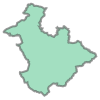

In [12]:
"Criar agora um dataframe Geopanda de apenas uma linha (que é diferente de um dataseries)"

#
exc[exc['Ano']==2010].loc['Abrantes']['geometry']

In [13]:
import random as rand

def makeMapTot(df, area):
    cmap=plt.cm.rainbow
    for m in area:
        muni=gpd.GeoDataFrame(df.loc[m]).T
        value=rand.random() #
        colorCode=mpl.colors.to_hex(cmap(value)[0:3])
        muni.plot(color = colorCode, ax=plt.gca())
    plt.show()

In [14]:
def colorFader(c1, c2, mix=0):
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

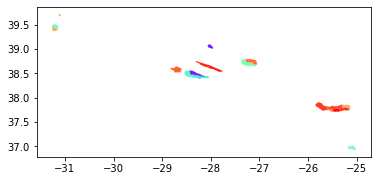

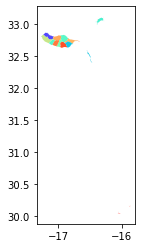

In [15]:
excl=exc[exc['Ano']==2010]
makeMapTot(excl, acores)
makeMapTot(excl, madeira)


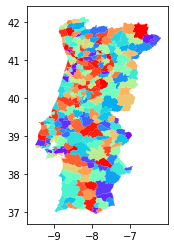

In [16]:
makeMapTot(excl, continente)